# TAREAS  a realizar
---
1. Introduccion
   - Contexto
   - Objectivo: Crear un modelo predictivo con Scikit Learn para predecir la variable 'cut' ( corte de diamante).
    
2. Cargar el *dataset diamond* <https://www.kaggle.com/code/rolandmueller/seaborn-diamonds-2-11-2020/input> con Pandas
    
3. Realizar una **exploracion estadistica descriptiva** de los datos con Panda
   - Descripcion de las variables.
   - Correlacion 
   - Valores unicos ( Unique) , mas frecuentes ( top ) , frecuencia de valor mas comun (freq).
   - Inspeccion de balanceo varibales categoricas.
  
4. EDAS (Exploratory Data Analisys)   
   - Detectar valores nulos.
   - Corregir valores nulos.
   - Corregir tipos de datos.
   - Eliminar duplicados.
   - Identificar Outliers y tratarlos.
  
5. Visualizacion 
   - Univariante
   - Bivariante
   - Multivariante
  
6. Modelado
   - Probar *varios* modelos de Scikit Learn , para predecir la columna tip del dataset
   - Escalar las columnas numericas
   - Particionar los datos con *train_test_split*
   - Ver el mejor modelo

# CARGA y LIMPIEZA


- Disponemos de un Data Set compuesto por 10 variables y 50.000 registos aproximadamente.

- El objetivo es predecir la variable cut (corte) que representa la variable de calidad de corte ( Regular , Buena , Muy Buena, Premium , Ideal ) .

- Consideraremos adoptar las metricas de ReCall , Precision, Accuracy y F1. 
  La  metrica de peso el ' recall ' es importante  para priorizar el posible costo de no detectar un positivo ( falso negativo) es alto, por clasificar un diamante con calidad baja. No podemos olvidarnaos de Precision para detectar la precision de detectar clases.


### Contexto

- El objectivo de la actividdad es predecir la variable categorica 'cut ' que representa la calidad del corte del diamante.

- La solucion del problema será de tipo CLASIFICACION y se resolverá eligiendo el mejor modelo aplicando distintos algoritmos y elegiendo basandonos en las metricas de clasidicacion.  

### Import

- Celda reservada para la carga de modelos y librerias necesarrias para el desarrollo de la actividad

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TRAIN  -TEST - METRICAS
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score,  confusion_matrix, classification_report,balanced_accuracy_score)

# PREPROCESAMIENTO 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import(MinMaxScaler, OneHotEncoder, StandardScaler,RobustScaler,PowerTransformer)
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.pipeline import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer

# MODELOS 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# VALIDACION CRUZADA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_validate



### Cargar DataSet 

- Cargamos el DataSet y mostramos las primeras 20 filas para supervisar el Data
- Mostramos los tipos de cada feature 

In [300]:
df = pd.read_csv('diamond.csv')
print(df.sample(n=5))

df.shape 

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
19813       19814   1.60  Very Good     F     SI2   60.5   60.0   8377  7.52   
41206       41207   0.53      Ideal     H     SI1   61.5   54.0   1205  5.21   
17351       17352   1.11    Premium     D     SI1   62.0   58.0   6962  6.68   
10716       10717   0.31  Very Good     D     SI2   63.1   54.0    593  4.38   
5693         5694   1.01  Very Good     I     SI1   62.0   54.0   3888  6.36   

          y     z  
19813  7.55  4.56  
41206  5.26  3.22  
17351  6.64  4.13  
10716  4.33  2.75  
5693   6.51  3.99  


(53940, 11)

###  Descripcion FEATURE

In [301]:
data = {
    "Variable": [
        "carat", "cut", "color", "clarity", "depth",
        "table", "price", "x", "y", "z"
    ],
    "Descripción": [
        "Peso del diamante en quilates",
        "Calidad del corte",
        "Color del diamante (D mejor, J peor)",
        "Claridad del diamante",
        "Profundidad total = 2*z/(x+y)",
        "Anchura de la parte superior relativa al punto más ancho",
        "Precio del diamante en dólares estadounidenses",
        "Longitud en mm",
        "Anchura en mm",
        "Profundidad en mm"
    ],
    "Rango / Categorías": [
        "0.2 - 5.01",
        "Fair, Good, Very Good, Premium, Ideal",
        "D, E, F, G, H, I, J",
        "I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF",
        "43 79",
        "43 - 95",
        "326 - 18 823",
        "0 - 10.74",
        "0 - 58.9",
        "0 - 31.8"
    ]
}

df_info = pd.DataFrame(data)
df_info


,Variable,Descripción,Rango / Categorías
0,carat,Peso del diamante en quilates,0.2 - 5.01
1,cut,Calidad del corte,"Fair, Good, Very Good, Premium, Ideal"
2,color,"Color del diamante (D mejor, J peor)","D, E, F, G, H, I, J"
3,clarity,Claridad del diamante,"I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF"
4,depth,Profundidad total = 2*z/(x+y),43 79
5,table,Anchura de la parte superior relativa al punto...,43 - 95
6,price,Precio del diamante en dólares estadounidenses,326 - 18 823
7,x,Longitud en mm,0 - 10.74
8,y,Anchura en mm,0 - 58.9
9,z,Profundidad en mm,0 - 31.8


In [302]:
# comprobamos las columnas del data frame
df.columns.to_list()

['Unnamed: 0',
 'carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 'x',
 'y',
 'z']

- eliminamos columnas innecesarias

In [303]:
# comprobamos antes de eliminar 
print("Columnas a eliminar:", df.columns[:1].tolist())

Columnas a eliminar: ['Unnamed: 0']


In [304]:
# hacemos una copia del df original y realizamos el drop de la columna que no queremos y mostramos el resultado
df_copy = df.copy()
df_unnamed=df_copy.drop(df_copy.columns[:1], axis=1)
df_unnamed.columns.to_list()


['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

- eliminamos la primera columna porque no aporta valor y asi mejoramos el futuro entrenamiento.

### Redimensionamiento dataset
- Generamos un nuevo df reducido para evitar complejidad computacional.A partir de ahora nuestro df base será el df_reduced 

In [305]:
df_reduced=df_unnamed.sample(5000,random_state=42)

df_display = df_reduced.head().copy() 
df_display = df_display.reset_index(drop=True) 
df_display

#print(df_reduced.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
1,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
2,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
3,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
4,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


### Inspeccion del data set

- tipos de datos

In [306]:
# 
print(
    f"DATA FRAME ORIGINAL\n"
    f"Numero de filas y columnas:{df.shape}\n"
    f"Numero total de elementos : {df.size}\n "
    )
print(
    f"DATA FRAME REDUCIDO \n"
    f"Numero de filas y columnas:{df_reduced.shape}\n"
    f"Numero total de elementos : {df_reduced.size}\n "
    )


print(df_reduced.dtypes.to_frame(name="TIPOS DE DATOS"))

DATA FRAME ORIGINAL
Numero de filas y columnas:(53940, 11)
Numero total de elementos : 593340
 
DATA FRAME REDUCIDO 
Numero de filas y columnas:(5000, 10)
Numero total de elementos : 50000
 
        TIPOS DE DATOS
carat          float64
cut                str
color              str
clarity            str
depth          float64
table          float64
price            int64
x              float64
y              float64
z              float64


  ### Revision NULOS - VALORES OCULTOS -  ESPACIOS EN BLANCOS - VALORES = 0
  - comprobamos si hay VALORES NULOS  en todo el dataframe original
  - comprobamos si hay ESPACIOS EN BLANCO en todo el dataframe original
  - comprobamos si hay VALORES OCULTOS  en todo el dataframe original

In [ ]:
df_nulos = pd.DataFrame({    
    'nulos': df_reduced.isna().sum()                                                        # muestra la suma de los nulos o faltantes contenidos en las columnas 
})
df_espacios = pd.DataFrame({
    "espacios": df_reduced.apply(lambda col: col.astype(str).str.strip().eq("").sum())      # muestra la suma de celdas con espacios vacios
})

valores_ocultos = ["", " ", "NA", "N/A", "na", "null", "None", "?", ".", "0"]

df_ocultos = pd.DataFrame({ 
    'ocultos': df_reduced.apply(lambda col: col.astype(str).isin(valores_ocultos).sum()) })  #  trasforma todas las columnas en string para poder comparar con valores_ocultos 

df_zeros= pd.DataFrame({
    "valores  = 0 ":df_reduced.apply( lambda col: (col == 0).sum())                           # suma todos los valores iguales a zeros de todas las columnas
})

df_Nan= pd.concat([df_nulos, df_espacios, df_ocultos, df_zeros], axis=1)
df_Nan

,nulos,espacios,ocultos,valores = 0
carat,0,0,0,0
cut,0,0,0,0
color,0,0,0,0
clarity,0,0,0,0
depth,0,0,0,0
table,0,0,0,0
price,0,0,0,0
x,0,0,0,0
y,0,0,0,0
z,0,0,0,0


- no se detectan : valores nulos ,  valores ocultos ,  espacios en blancos ni valores iguales a zero.

In [308]:
# duplicados por columna (valores repetidos dentro de cada columna)
df_duplicados_col = pd.DataFrame({'duplicados': df.apply(lambda col: col.duplicated().sum())})

# filas duplicadas totales 
filas_duplicadas = int(df.duplicated().sum())

print(f"\nFilas duplicadas totales: {filas_duplicadas}")


Filas duplicadas totales: 0


- no hay filas duplicadas en nuestro dataset de muestra.

# EDAs

### Tabla de estadisticos principal para ver centralidad y dispercion

In [505]:
tabla_basica = df_reduced.describe(include='all').rename(index={
    'count': 'Total',
    'unique':'Valor unicos',
    'top': 'Valor + frecuente',
    'freq' :'Valor + comun',
    'mean' :'Media',
    'std':'Desviacion',
    'min': 'Valor minimo',
    'max': 'Valor maximo'
})

tabla_basica


,carat,cut,color,clarity,depth,table,price,x,y,z
Total,5000.000000,5000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
Valor unicos,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
Valor + frecuente,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
Valor + comun,NaN,1953,1044,1182,NaN,NaN,NaN,NaN,NaN,NaN
Media,0.797118,NaN,NaN,NaN,61.783100,57.438580,3917.294400,5.721784,5.722654,3.533868
Desviacion,0.483612,NaN,NaN,NaN,1.436638,2.267361,4044.422491,1.138951,1.131908,0.702334
Valor minimo,0.200000,NaN,NaN,NaN,54.400000,49.000000,335.000000,3.850000,3.810000,1.410000
25%,0.390000,NaN,NaN,NaN,61.100000,56.000000,920.500000,4.680000,4.690000,2.890000
50%,0.700000,NaN,NaN,NaN,61.900000,57.000000,2352.000000,5.690000,5.700000,3.510000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5252.750000,6.540000,6.540000,4.030000


Report rapido sobre columnas numericas:
- en 'caract' hay cierta variacion , porque el valor de desviacion es bastante elevado respecto al valor medio, sin embargo la media y mediana coinciden. Presenta un valor maximo muy elevado
- en 'depth' y 'table' la desviacion es muy baja respecto al valor medio y la media y mediana son practicamente identicas.
- en 'price' hay mucha desviacion , con valores maximo muy grande y cierta variacion entre media y mediana sugeriendonos que pueden haber outliers
- en 'X' y 'Y' la desviacion no es grade y la media y mediana son practicamente identicas.
- en 'Z' la dessviacion es aun menor y la media y mediana coinciden.
- las variables cualitativas no parecen bien balanceadas, sobretodo en el caso de 'cut' cuyo valor mas comun es bastante elevado respecto al total (1974 / 5000 ), viendo ademas que hay nº 5 valores unicos y tambien en 'clarity' ( 1203/5000) con nº8 valores unicos.

,conteo,procentaje
cut,,
Ideal,1953,39.06
Premium,1312,26.24
Very Good,1108,22.16
Good,465,9.30
Fair,162,3.24


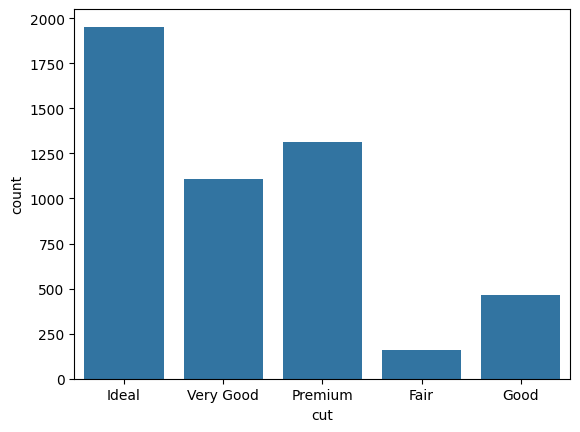

In [310]:
# COMPROBAR BALANCEO      de la variable respuesta y 
df_balanceo = pd.DataFrame({
    "conteo": df_reduced['cut'].value_counts(),
    "procentaje":(df_reduced['cut'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='cut')
df_balanceo

Efectivamente podemos apreciar que los datos no estan balanceados.

### Graficos Var/Numericas

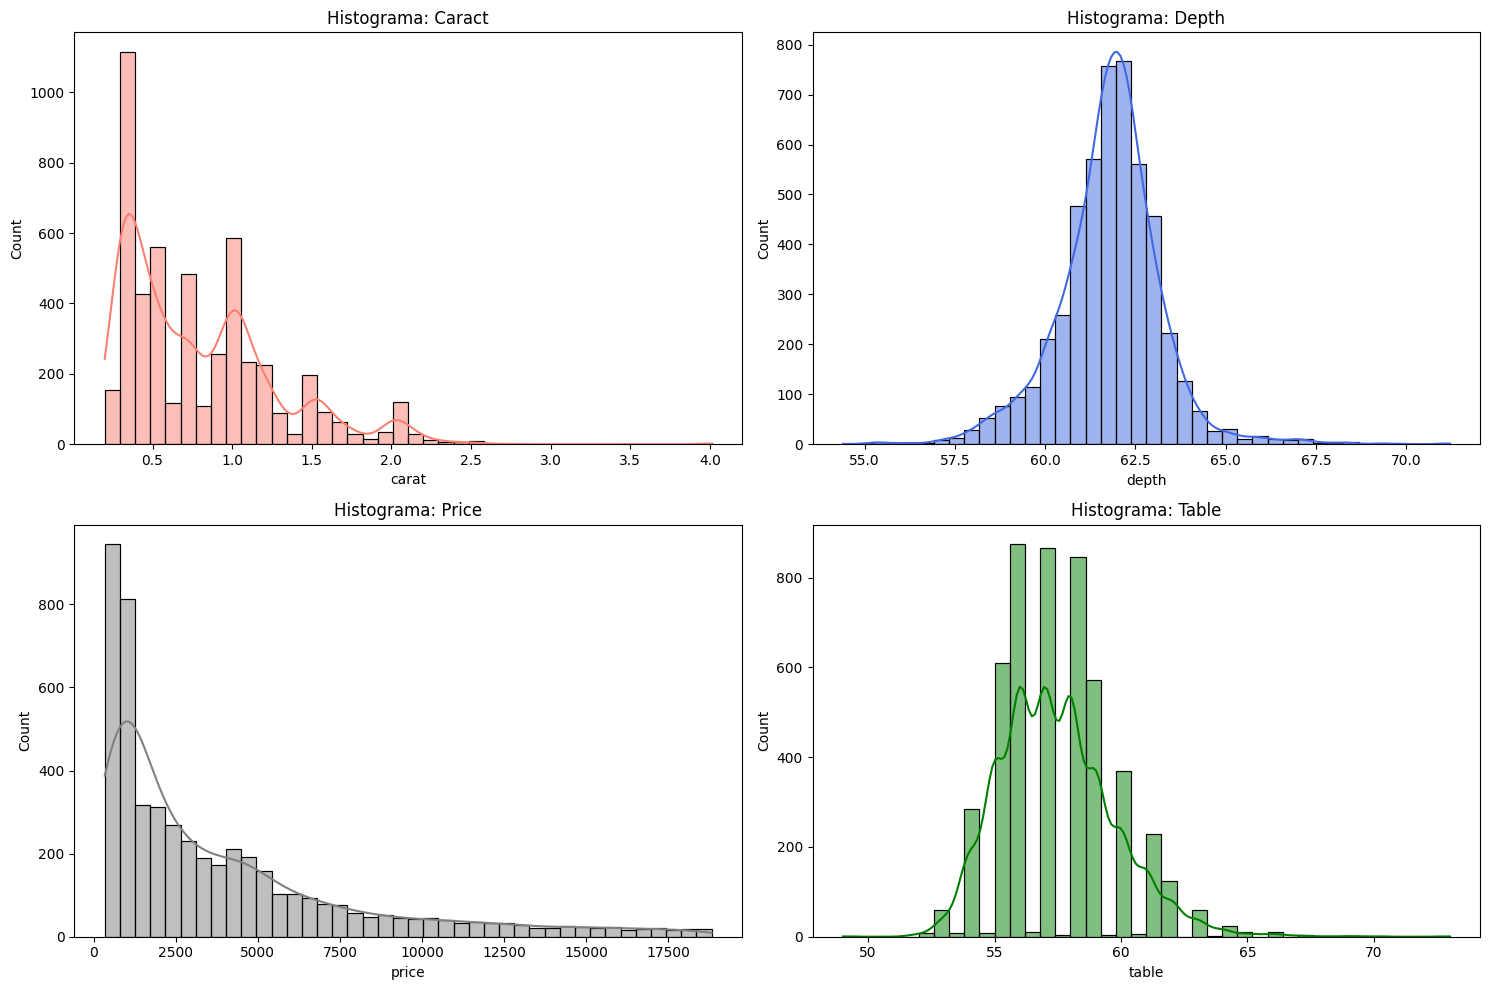

In [311]:
plt.figure(figsize=[15,10])

# Subplot CARACT
plt.subplot(2,2,1)
sns.histplot(data=df_reduced, x='carat', bins=40, kde=True, color='salmon')
plt.title('Histograma: Caract')

# Subplot DEPTH
plt.subplot(2,2,2)
sns.histplot(data=df_reduced, x='depth', bins=40, kde=True, color='royalblue')
plt.title('Histograma: Depth')

# Subplot PRICE
plt.subplot(2,2,3)
sns.histplot(data=df_reduced, x='price', bins=40, kde=True, color='gray')
plt.title('Histograma: Price')

# Subplot TABLE
plt.subplot(2,2,4)
sns.histplot(data=df_reduced, x='table', bins=40, kde=True, color='green')
plt.title('Histograma: Table')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribucion Profundidad')

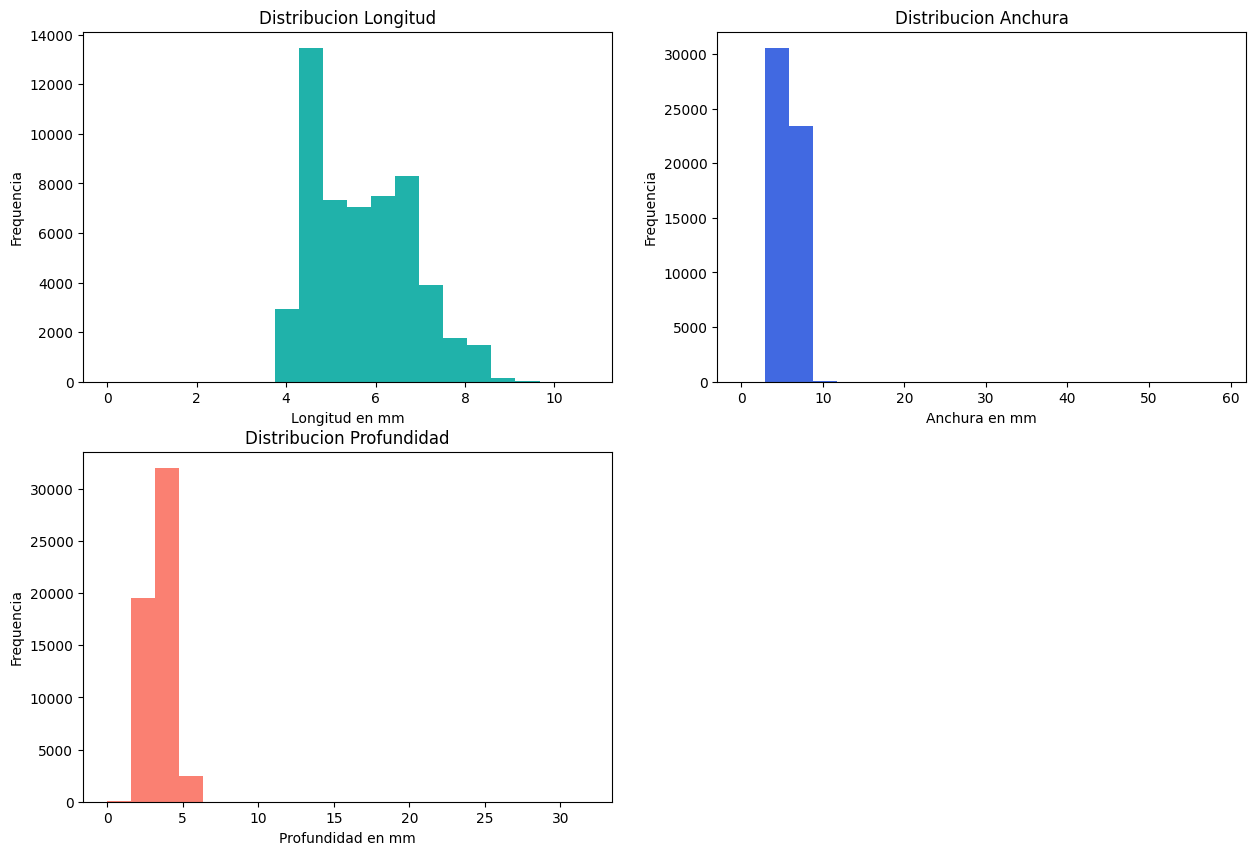

In [312]:
plt.figure(figsize=[15,10])

# Subplot X- Longitud
plt.subplot(2,2,1)
plt.hist(df['x'],bins=20,color='lightseagreen')
plt.xlabel('Longitud en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Longitud')

# Subplot V- ANCHURA
plt.subplot(2,2,2)
plt.hist(df['y'],bins=20,color='royalblue')
plt.xlabel('Anchura en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Anchura')

# Subplot Z-profunidad
plt.subplot(2,2,3)
plt.hist(df['z'],bins=20,color='salmon')
plt.xlabel('Profundidad en mm')
plt.ylabel('Frequencia')
plt.title('Distribucion Profundidad')

#### visulializacion graficas de las variables numericas

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


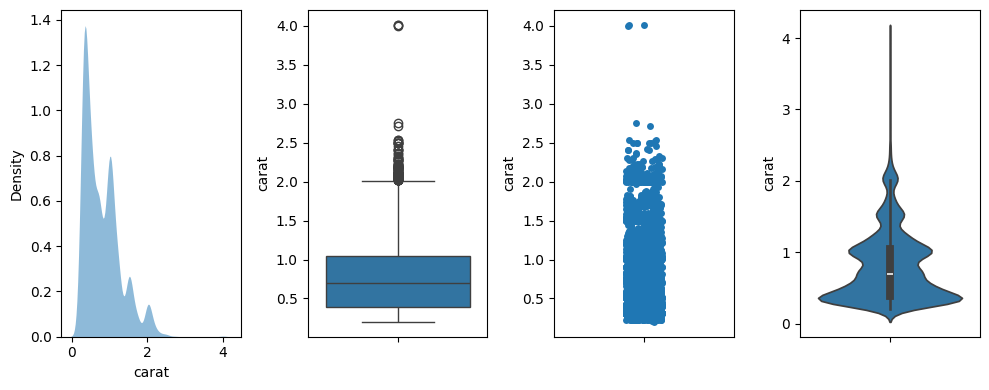

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


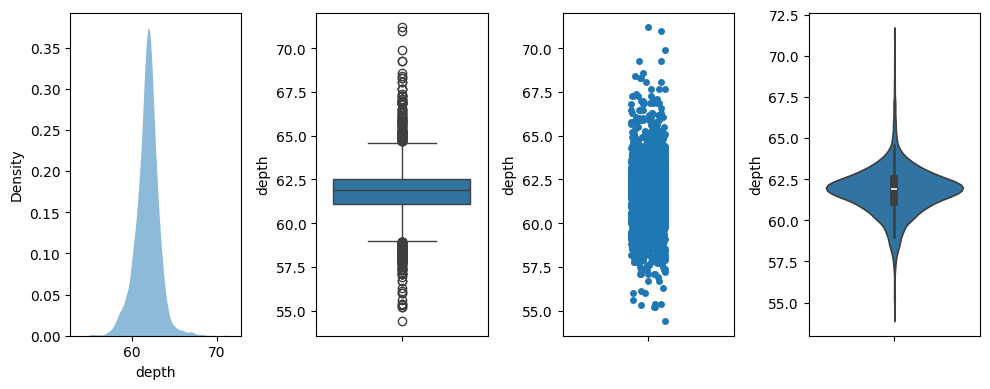

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


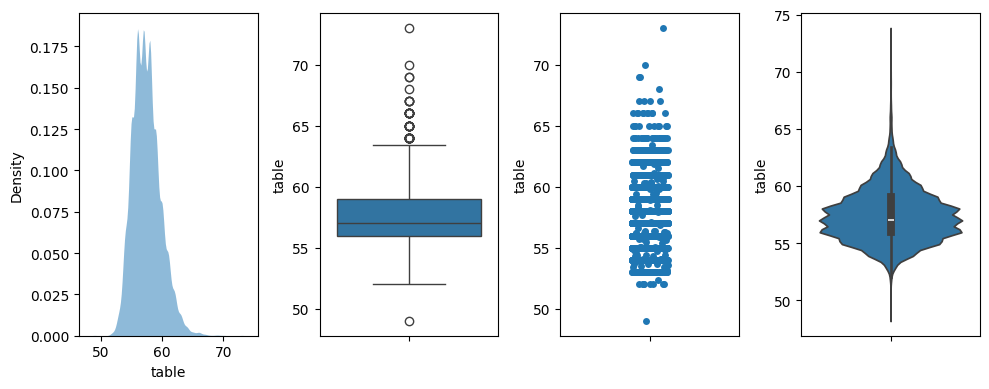

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


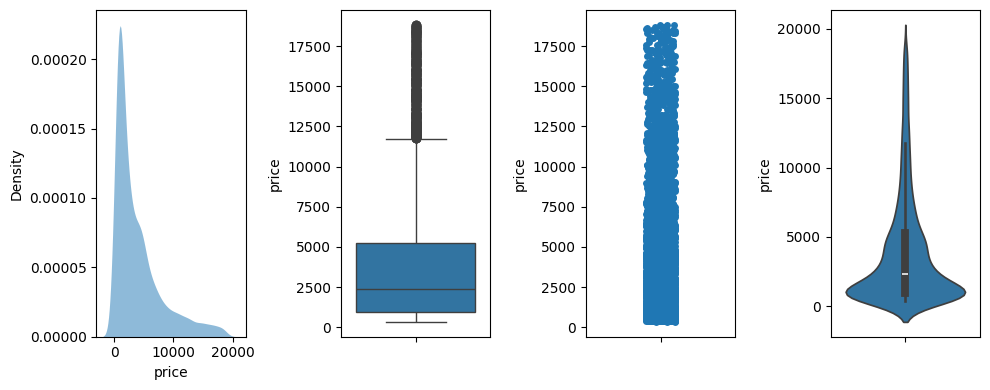

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


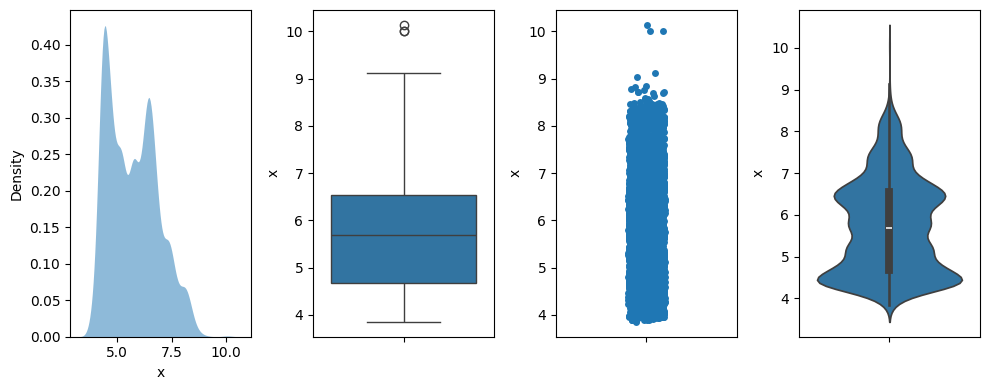

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


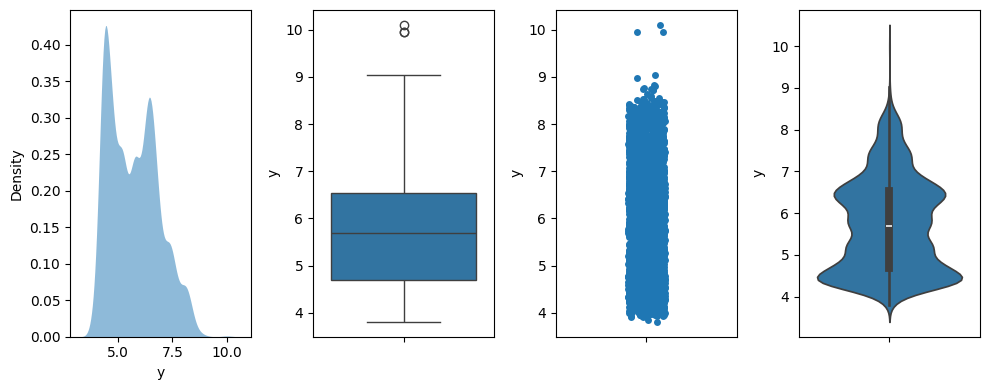

C:\Users\marco\AppData\Local\Temp\ipykernel_26036\1079333185.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


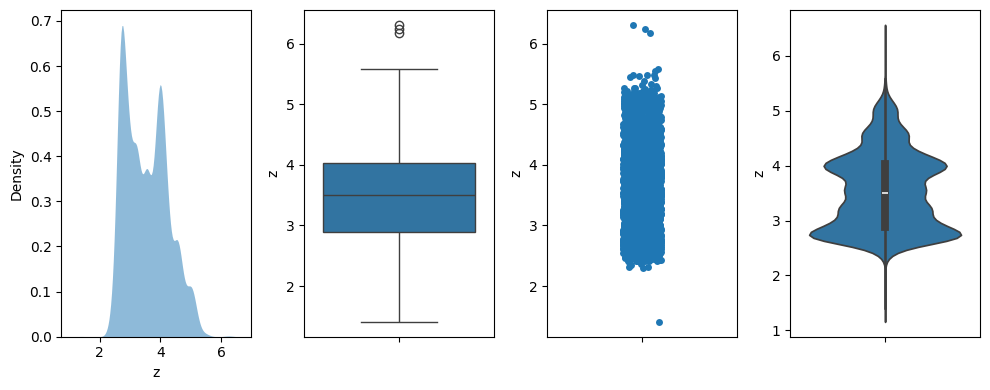

In [313]:
tipos_variables = pd.DataFrame(df_reduced.dtypes)

sel_columnas = (tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')
var_num = df_reduced.columns[sel_columnas]

for i in var_num:
   fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
   sns.kdeplot(
      data=df_reduced, x=i,
      fill=True, common_norm=False, palette="crest",
      alpha=.5, linewidth=0, ax=axs[0])
   sns.boxplot(data=df_reduced,   y=i,   ax=axs[1])
   sns.stripplot(data=df_reduced, y= i, ax=axs[2])
   sns.violinplot(data=df_reduced, y=i, ax=axs[3])
   
   fig.tight_layout()
   plt.show()

#### visualizacion BOX-PLOT

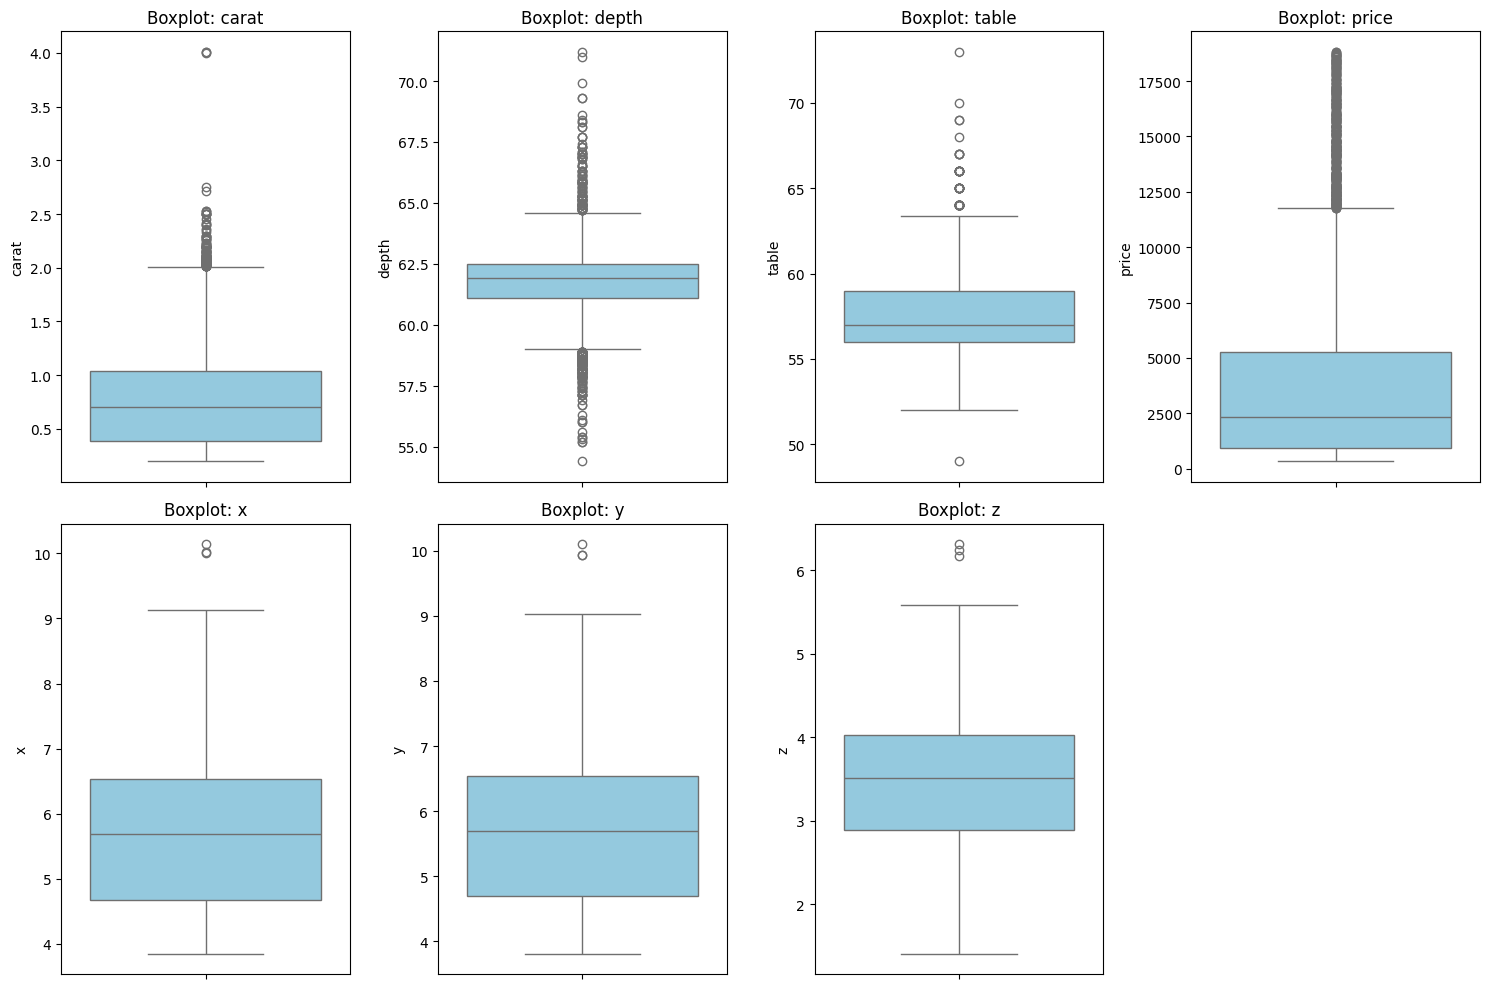

In [314]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df_reduced, y=col, color='skyblue')
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.show()

- tenemos la presencias de muchos valores outliers, que tendremso que evaluar y considerar. 
  Tendriamos que valorar si son errores en los datos ( en este caso eliminar) o si son valores extremos.

In [315]:
# función para cuantificar outliers (IQR)
def contar_outliers_iqr(df_reduced, cols=None, factor=1.5):
    cols = cols if cols is not None else df_reduced.select_dtypes(include=[np.number]).columns
    res = {}
    for c in cols:
        q1 = df_reduced[c].quantile(0.25)
        q3 = df_reduced[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - factor * iqr
        upper = q3 + factor * iqr
        mask = (df_reduced[c] < lower) | (df_reduced[c] > upper)
        res[c] = {'outliers / ud': int(mask.sum()), '%': round(mask.mean()*100,2)}   # mask (:boolean (si-no outliers)) / cuenta cuantos outlieres hay  # pct es el procentaje 
    return pd.DataFrame(res).T

contar_outliers_iqr(df_reduced, cols=['price','carat','table', 'depth'])

,outliers / ud,%
price,352.0,7.04
carat,134.0,2.68
table,55.0,1.10
depth,291.0,5.82


- el porcentaje de outlier no es relevante.Comprobamos si son valores muy extremos, valoraremos si son errores y en caso afirmativo se eliminaran.

In [508]:
def mostrar_extremos(df_reduced, cols, n=10):
    for c in cols:
        print(f"\nColumna: {c}")
        print("  Más pequeños:")
        display(df_reduced.nsmallest(n, c)[[c]])
        print("  Más grandes:")
        display(df_reduced.nlargest(n, c)[[c]])

cols_num = ['price','carat','depth','table']
mostrar_extremos(df_reduced, cols_num, n=10)




Columna: price
  Más pequeños:


,price
3142,335
3023,336
2971,358
579,360
3149,367
4086,367
35,373
4208,373
1141,378
2181,380


  Más grandes:


,price
2762,18823
426,18803
1076,18784
3100,18745
2124,18718
1927,18691
2533,18678
4306,18659
1236,18640
3274,18575



Columna: carat
  Más pequeños:


,carat
3149,0.20
3511,0.21
29,0.23
95,0.23
734,0.23
1056,0.23
1141,0.23
1162,0.23
1217,0.23
1361,0.23


  Más grandes:


,carat
2980,4.01
4991,4.01
1252,4.00
218,2.75
2099,2.71
2249,2.53
3227,2.53
48,2.52
1049,2.50
1218,2.50



Columna: depth
  Más pequeños:


,depth
2893,54.4
239,55.2
3555,55.2
12,55.3
5,55.4
1029,55.4
851,55.6
1523,56.0
2438,56.0
2452,56.1


  Más grandes:


,depth
4197,71.2
4618,71.0
2999,69.9
1549,69.3
4458,69.3
2262,68.6
708,68.4
1195,68.3
4055,68.3
1277,68.1



Columna: table
  Más pequeños:


,table
1805,49.0
1313,52.0
1480,52.0
2097,52.0
2632,52.0
2655,52.0
3229,52.0
4170,52.0
4915,52.0
1046,52.4


  Más grandes:


,table
851,73.0
2309,70.0
770,69.0
3069,69.0
3675,68.0
608,67.0
2438,67.0
2722,67.0
4671,67.0
16,66.0


- En Price tenemos valores muy dispares, el resto de feature no es tan grande. Vigilaremos que como afectan al modelo. 

#### Descripcion MULTIVARIADA [ correlacion entre variables]

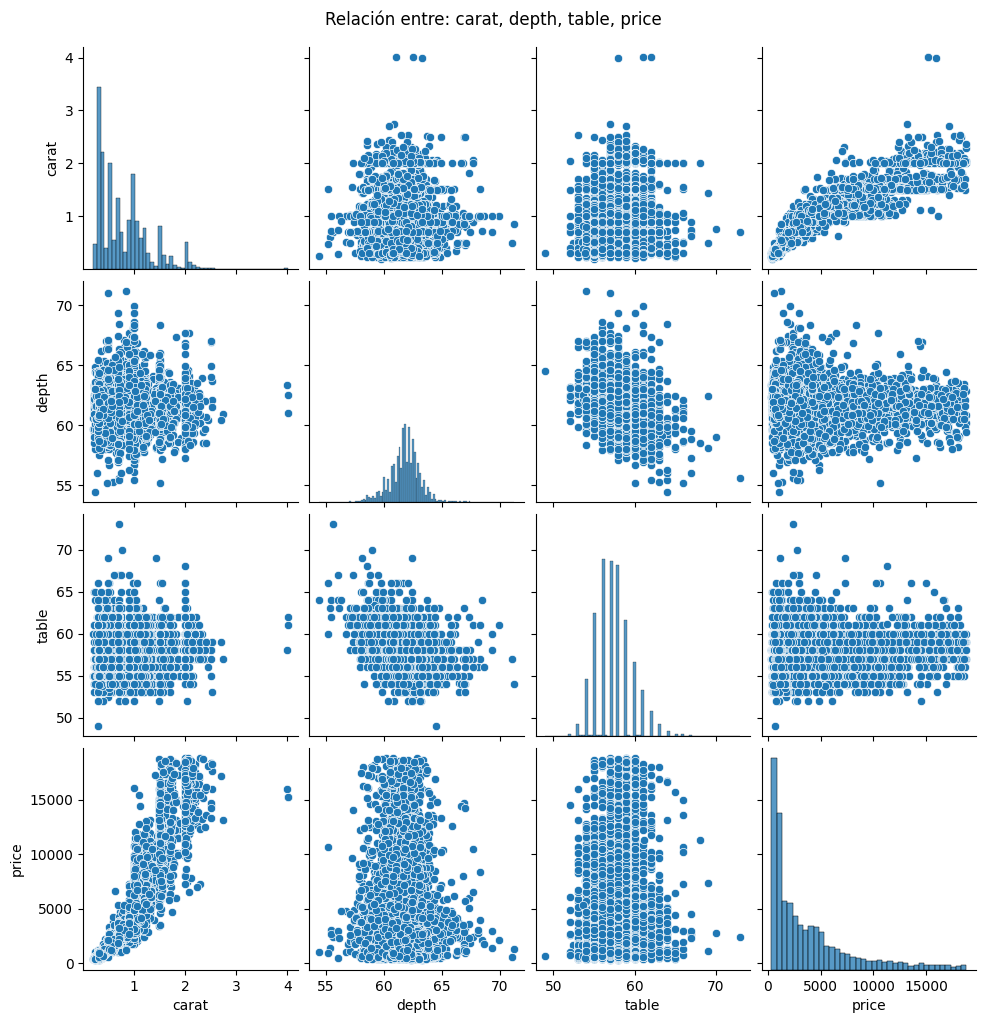

In [317]:
sns.pairplot(data=df_reduced, vars=['carat', 'depth', 'table', 'price'], diag_kind='hist', height=2.5)
plt.suptitle('Relación entre: carat, depth, table, price', y=1.02)
plt.show()

- CONLUSIONES: 
  - 'price' y 'caract' muestran un correlacion positiva pero no lineal. EN la cola superior se expande, posibles presencia de outliers. La distribucion es sesgada a la derecha
  - 'depth' y 'table' presentan relacion debil con 'price '
  - 'depht' y 'table' y 'carat' y 'table' presentan una estructura tipo cluster, con muy poca tendenicas linear.
  - ' caract' y ' depht' presentan una estructura tipo cluster, con muy poca tendenicas linear.
  - Conclusion price y caract tiene la "mejor" correlacion.

Analizamos con mayor detalle la relacion de las variables Price y Caract respecto a Cut

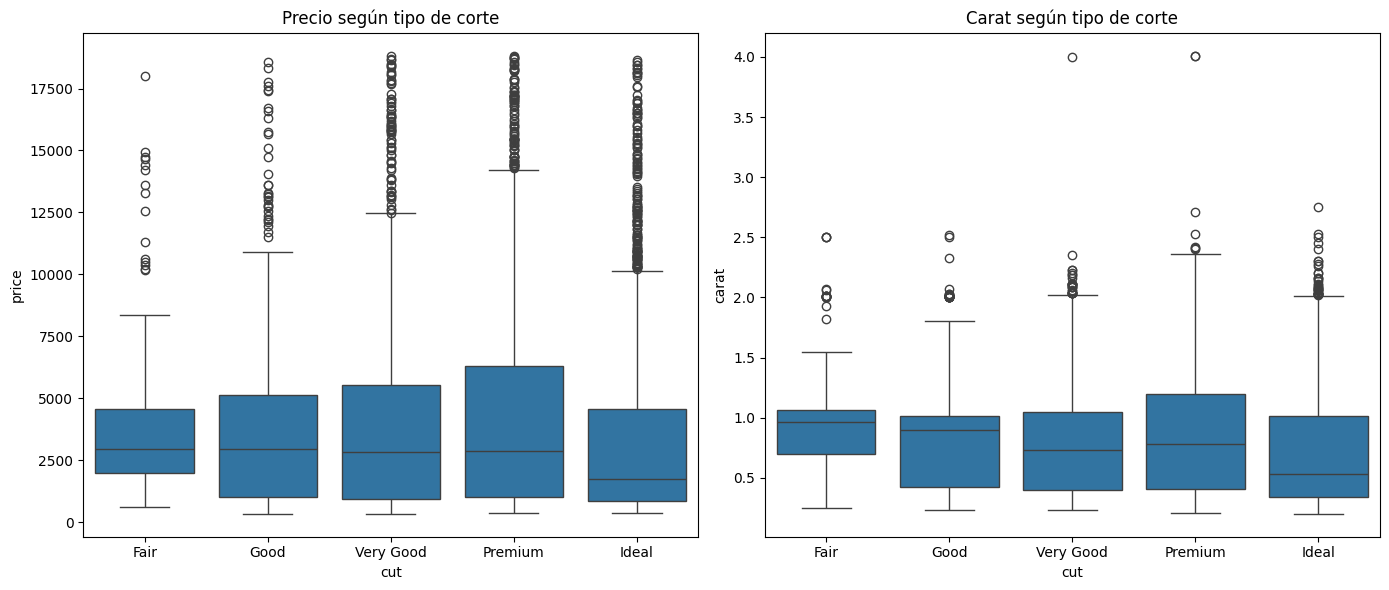

In [515]:
plt.figure(figsize=(14,6))

# grafico Precio - Corte
plt.subplot(1, 2, 1)

sns.boxplot(data=df_reduced, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Precio según tipo de corte')


# Grafico Carat - corte
plt.subplot(1, 2, 2)

sns.boxplot(data=df_reduced, x='cut', y='carat', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Carat según tipo de corte')


plt.tight_layout()
plt.show()



La mediana de precio es mas alta siendo el corte peor, probablemente debido a la varible carat que para el mismo corte tiene un peso mayor. Cuanto mas grande el diamate mas caro aunque el corte no es de mejor calidad.
El corte Ideal tiene mucho mas outliers respecto a otros cortes, probablemente por una valoracion que no se puede representar en el grafico.
A menor caract mejor corte.

#### Headmap

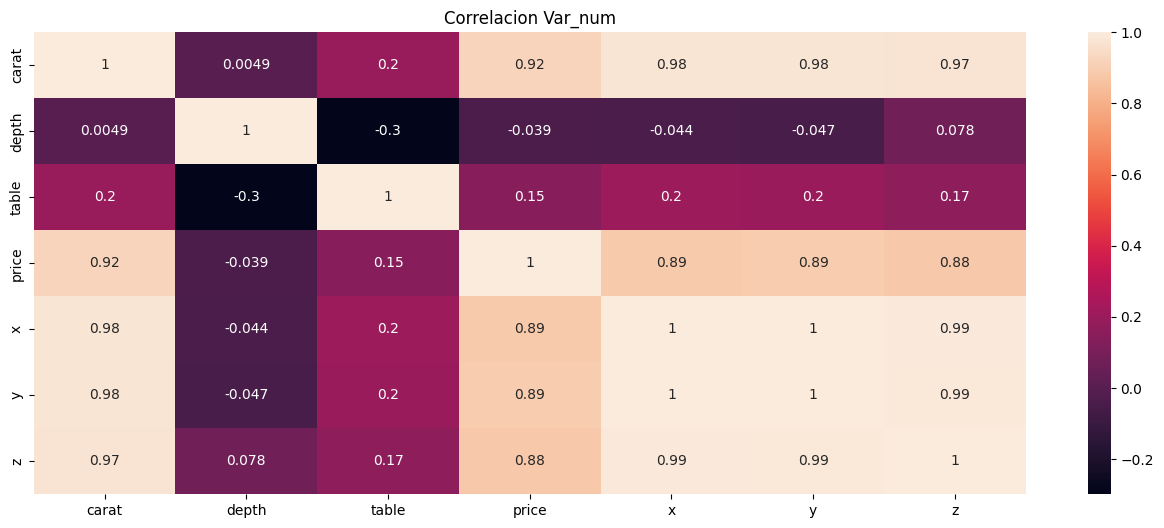

In [ ]:
X = df_reduced[var_num]  # selecciono solo las variables numericas

plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(X.corr(),annot=True)
heatmap.set_title('Correlacion Var_num')

plt.show()

- hay presencia de multicolinealidad alta entre las mismas  x , y , z  y  tambien respecto a caract, ademas de caract frente a price.

### Graficos Var/Categorica

#### Visualizacion CLARITY
   - tabla conteo y porcentaja
   - histograma
   - Heatmap  con 'cut'

,clarity,procentaje
clarity,,
SI1,1182,23.64
VS2,1166,23.32
SI2,868,17.36
VS1,758,15.16
VVS2,455,9.10
VVS1,345,6.90
IF,142,2.84
I1,84,1.68


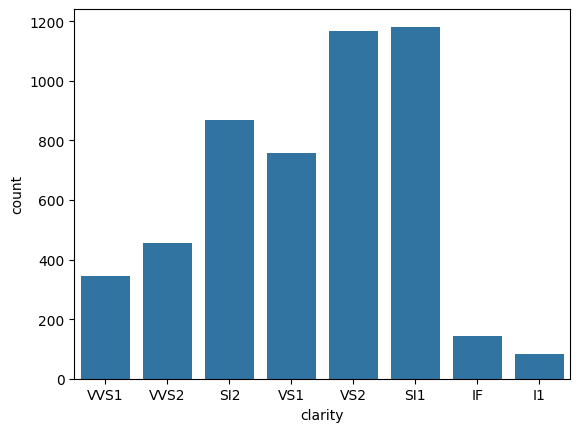

In [319]:
df_clarity = pd.DataFrame({
    "clarity": df_reduced['clarity'].value_counts(),
    "procentaje":(df_reduced['clarity'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='clarity')
df_clarity



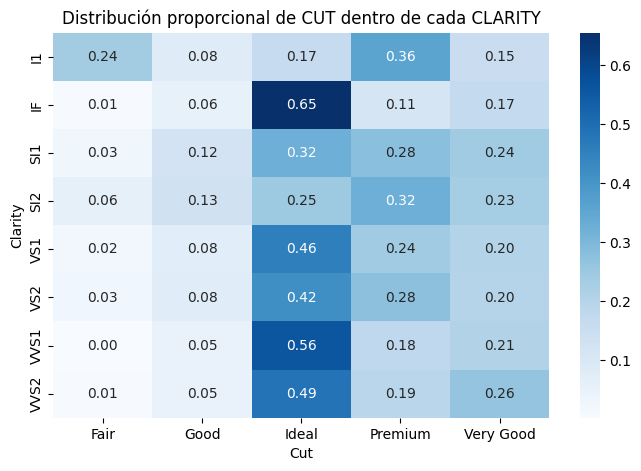

In [320]:
tabla = pd.crosstab(df_reduced['clarity'], df_reduced['cut'], normalize='index')

plt.figure(figsize=(8,5))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt=".2f")
plt.title('Distribución proporcional de CUT dentro de cada CLARITY')
plt.ylabel('Clarity')
plt.xlabel('Cut')
plt.show()


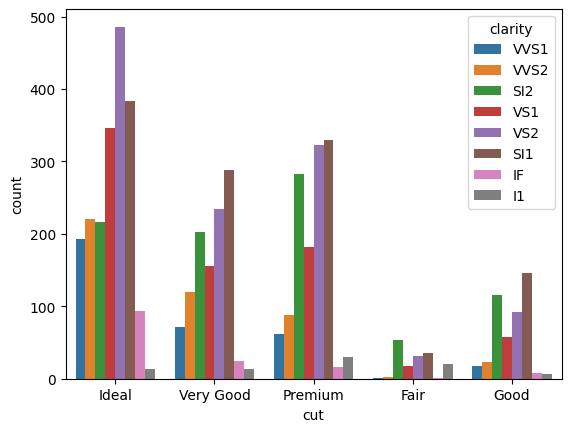

In [321]:
x = 'cut'
y = 'clarity'

sns.countplot(x=x, hue=y, data=df_reduced)
plt.show()


####  Visualizacion COLOR
   - tabla conteo y porcentaja
   - histograma
   - heatmap con 'cut'

,color,procentaje
color,,
G,1044,20.88
E,939,18.78
F,872,17.44
H,750,15.00
D,619,12.38
I,525,10.50
J,251,5.02


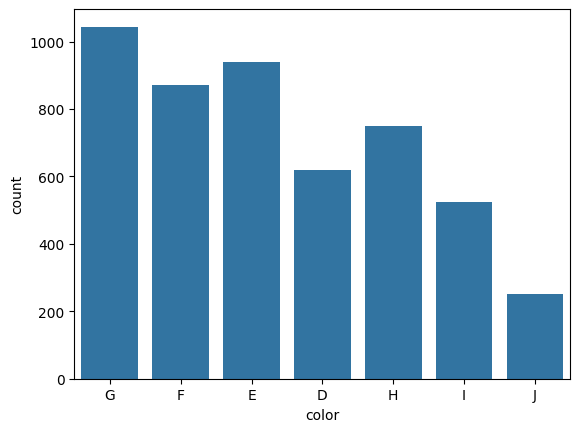

In [322]:
df_color = pd.DataFrame({
    "color": df_reduced['color'].value_counts(),
    "procentaje":(df_reduced['color'].value_counts(normalize=True)*100).round(2)
})
sns.countplot( df_reduced, x ='color')
df_color

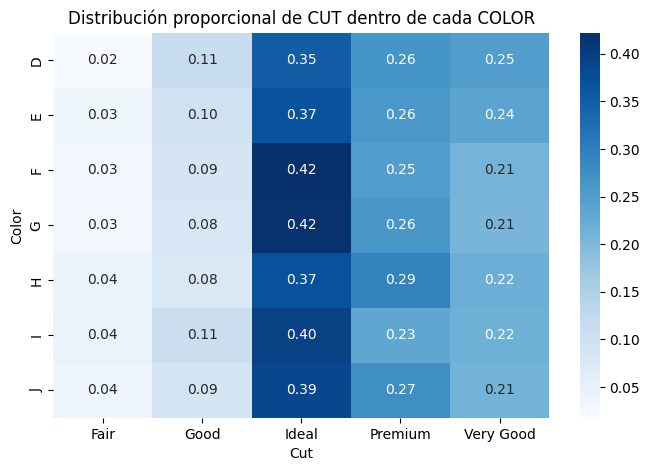

In [323]:
tabla = pd.crosstab(df_reduced['color'], df_reduced['cut'], normalize='index')

plt.figure(figsize=(8,5))
sns.heatmap(tabla, annot=True, cmap='Blues', fmt=".2f")
plt.title('Distribución proporcional de CUT dentro de cada COLOR')
plt.ylabel('Color')
plt.xlabel('Cut')
plt.show()


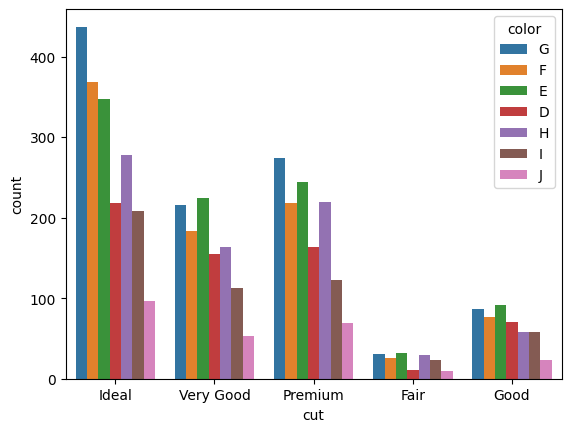

In [324]:
x = 'cut'
y = 'color'

sns.countplot(x=x, hue=y, data=df_reduced)
plt.show()

## CONCLUSIONES [ Ayuda previa a PREPROCESADO]



# SEPARACION X , y

### SEG X , y [ UNA FEATURE numerica]

Elegimos 'caract' como base inicial, por tener alta varianza como se ha podido percibir en el EDAs. Tambien contar que tiene una relacion mas lineal con 'price' que podria aportar cierta señal para 'cut.

#### X -y

In [358]:
# comprobamos fials vacias de 'cut' 
n_before = len(df_reduced)
df_reduced = df_reduced.dropna(subset=['cut']).reset_index(drop=True)
n_dropped = n_before - len(df_reduced)
print(f"Dropped {n_dropped} filas vacias de 'cut'")

# Preparamos la feature
X=df_reduced[['carat']]
y=df_reduced['cut']


# Particiononamos los datos para Entrenamiento y test (80-20)
X_train , X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 , random_state=42, stratify=y)

# Mostramos el reparto X
print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de test: {len(X_test)}")

# Mostramos el reparto y 

print(f"Muestras de entrenamiento: {len(y_train)}")
print(f"Muestras de test: {len(y_test)}")


Dropped 0 filas vacias de 'cut'
Muestras de entrenamiento: 4000
Muestras de test: 1000
Muestras de entrenamiento: 4000
Muestras de test: 1000


particionamiento correcto.

#### Pipeline

In [365]:
pipeline= make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler(),
    LogisticRegression()
)

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)

print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

Accuracy:0.401


#### Matriz e Confusion

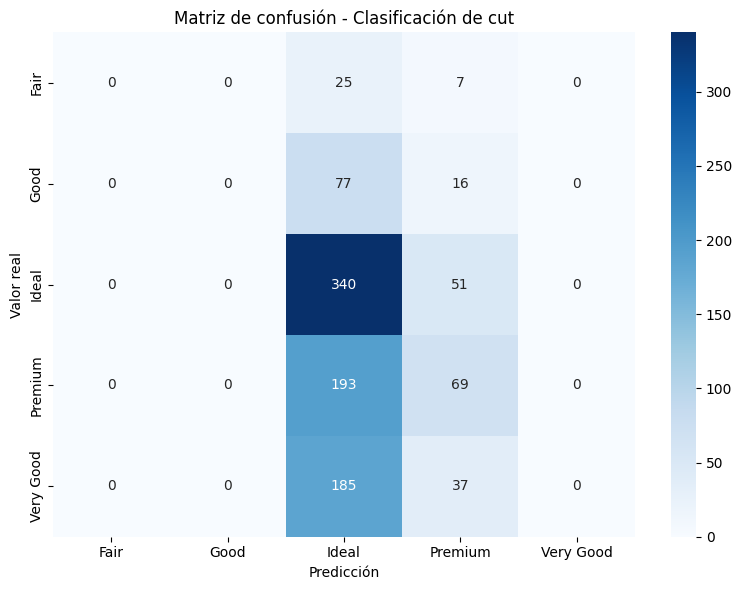

In [340]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Clasificación de cut')
plt.tight_layout()
plt.show()


#### Report Clasificacion + Metricas

In [341]:
reporte_dict = classification_report(
    y_test, y_pred, target_names=labels, zero_division=0, output_dict=True
)

df_reporte = pd.DataFrame(reporte_dict).T
df_reporte["Predictor"] = "carat"

df_reporte

,precision,recall,f1-score,support,Predictor
Fair,0.000000,0.000000,0.000000,32.000,carat
Good,0.000000,0.000000,0.000000,93.000,carat
Ideal,0.414634,0.869565,0.561519,391.000,carat
Premium,0.383333,0.263359,0.312217,262.000,carat
Very Good,0.000000,0.000000,0.000000,222.000,carat
accuracy,0.409000,0.409000,0.409000,0.409,carat
macro avg,0.159593,0.226585,0.174747,1000.000,carat
weighted avg,0.262555,0.409000,0.301355,1000.000,carat


In [366]:
print(f'accuracy_score {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score {balanced_accuracy_score(y_test, y_pred):.4f}')
print(f'precision_score {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}')

accuracy_score 0.401
balanced_accuracy_score 0.2177
precision_score 0.2562


- Conclusiones

El DataSet no presenta nulos o datos faltantes, vamos a implementar una tecnica de imputer con  mediana ( mas robusta) porque el EDA nos describe una  distribucion  claramente asimetrica a la derecha con una cola bastante larga, y la tendencia central presenta una media mayor que la mediana indice de sesgo por valores grandes, outliers altos ( diamantes muy grandes).

Por el mismo motivo utilizamos un escalado mas robusto frente a Outlier como RobustScaler ya que utiliza la mediana y el rango intercuartilico en vez de media y desviacion estandard.

METRICAS del modelo ( sobre el test):
Las metricas no son muy favorables:
* accuracy muy bajo, indicando que solo el 40% de las prediciones fueron correctas.
* balanced_accuracy, indica que el modelo falla en muchas clases, probablemente por el sesgo que presentan los datos.
* precision, un valor tan bajo nos indica que de las predicciones positivas, muchas son falsas. 

MATRIZ DE CONFUSION :

Es evidente que el modelo esta funcionando muy mal, solo está prediciendo "bien" la clase Ideal y el resto fracasa completamente.
*   recall 0.00 nos esta indicando que nunca predice esas clases ( Fair- Good -Very Good)
*   precison 0.00 nos indica que cuando predice nunca acierta las clases ( siguen siendo las mismas)
*   f1 0.00 que es la media entre recall y precision , nos indica que no hay equilibrio entre las dos metricas

Conclusion: el modelo solo aprende por la Clase Ideal e ignora el resto de clases. Solo con los datos de carat el rendimiento es muy bajo y es neceario probar añadiendo mas feature y probando otros modelos. Dado los malos resultado no es necesario realizar una validacion cruzada 


### SEG X, y [ VARIAS FEATURE NUMERICAS]

Procedemos a incorporar todas las feature disponibles de tipo numerico.
No contemplamos las x,y,z porque en el EDA's nos muestra  valores a 1 ( > 0.95) indicandonos MULTICOLINEALIDAD. Estos valores miden practicamente lo mismo ( dimensinoens fisicas)de tal forma que al conocer una dimension podriamos prediecir muy bien el resto de valores, aportando de esta forma indorfacion duplicada que interfeieren en el modelo.

In [492]:
# comprobamos fials vacias de 'cut' 
n_before = len(df_reduced)
df_reduced = df_reduced.dropna(subset=['cut']).reset_index(drop=True)
n_dropped = n_before - len(df_reduced)
print(f"Dropped {n_dropped} filas vacias de 'cut'")

resultados = []

predictores = ['carat','depth','table','price']

for predictor in predictores:
    X= df_reduced[[predictor]]
    y= df_reduced['cut']

    pipeline= make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler(),
    LogisticRegression()
)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42 , stratify=y  
    )
    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    

    resultados.append({
        'Modelo': 'Regresion logistica',   # Regresion Logistica 
        'Predictor': f'RLOG {predictor}',              
        'accuracy': accuracy_score(y_test, y_pred),
        'balancead': balanced_accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0)               
    })
    
df_res_multi_num = pd.DataFrame(resultados) 
df_res_multi_num


Dropped 0 filas vacias de 'cut'


,Modelo,Predictor,accuracy,balancead,precision
0,Regresion logistica,RLOG carat,0.409,0.226585,0.262555
1,Regresion logistica,RLOG depth,0.434,0.327608,0.313548
2,Regresion logistica,RLOG table,0.595,0.361770,0.394392
3,Regresion logistica,RLOG price,0.401,0.217708,0.256238


Aplicando mas variables, siempre utilizando el  mismo modelo de regresion logisica, se aprecia cierta mejoria en la metrica accuracy de 'table' ( anchura superior) aunque puede que no sea del todo correcta.

Ninguna variable por si sola es capaz de predecir bien.

### SEG X, Y [ UNA FEATURE categorica ]

Probamos ahora con una variable categorica, tal vez mas relacionada con la variable dependiente  'cut' y elegimos 'clarity' porque aparentemente parece guardar una mejor distribucion respecto a cada variable 'cut'.

#### X- y

In [491]:
# comprobamos fials vacias de 'cut' 
n_before = len(df_reduced)
df_reduced = df_reduced.dropna(subset=['cut']).reset_index(drop=True)
n_dropped = n_before - len(df_reduced)
print(f"Dropped {n_dropped} filas vacias de 'cut'")

# Preparamos la feature categorica
X=df_reduced[['clarity']]
y=df_reduced['cut']


# Particiononamos los datos para Entrenamiento y test (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2 , random_state=42, stratify=y)

# Mostramos el reparto X
print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de test: {len(X_test)}")

# Mostramos el reparto y 

print(f"Muestras de entrenamiento: {len(y_train)}")
print(f"Muestras de test: {len(y_test)}")

Dropped 0 filas vacias de 'cut'
Muestras de entrenamiento: 4000
Muestras de test: 1000
Muestras de entrenamiento: 4000
Muestras de test: 1000


#### Pipeline

No aplicamos mapeo a las variables categoricas para evitar crear ordinalidad e introducir posibles sesgo que podrian afectar al rendimiento.
Se tratará con OneHorEncoder.

In [351]:
pipeline= make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
    LogisticRegression()
)

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)

#### Matriz de Confusion

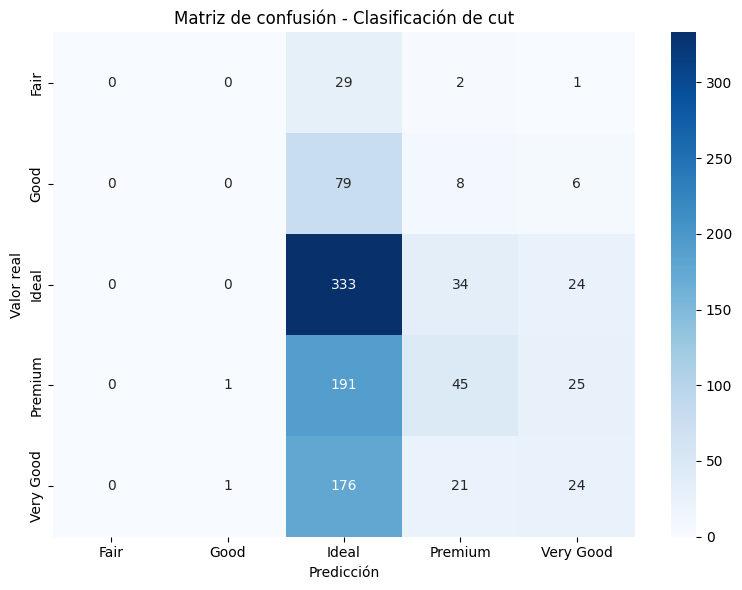

In [352]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)

plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Clasificación de cut')
plt.tight_layout()
plt.show()

#### Report Clasificacion + Metricas

In [353]:
report_clarity= classification_report(
    y_test, y_pred, target_names=labels, zero_division=0, output_dict=True
)

df_repo_clarity = pd.DataFrame(report_clarity).T
df_repo_clarity["Predictor"] = "clarity"

df_repo_clarity

,precision,recall,f1-score,support,Predictor
Fair,0.000000,0.000000,0.000000,32.000,clarity
Good,0.000000,0.000000,0.000000,93.000,clarity
Ideal,0.412129,0.851662,0.555463,391.000,clarity
Premium,0.409091,0.171756,0.241935,262.000,clarity
Very Good,0.300000,0.108108,0.158940,222.000,clarity
accuracy,0.402000,0.402000,0.402000,0.402,clarity
macro avg,0.224244,0.226305,0.191268,1000.000,clarity
weighted avg,0.334924,0.402000,0.315858,1000.000,clarity


In [354]:
print(f'accuracy_score {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score {balanced_accuracy_score(y_test, y_pred):.4f}')
print(f'precision_score {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}')

accuracy_score 0.402
balanced_accuracy_score 0.2263
precision_score 0.3349


### SEG X, Y [ VARIAS FEATURE categoricas ]

Procedemos a incorporar todas las feature disponibles de tipo categorico, para valorar si los resultados mejoran.

In [493]:
# comprobamos fials vacias de 'cut' 
n_before = len(df_reduced)
df_reduced = df_reduced.dropna(subset=['cut']).reset_index(drop=True)
n_dropped = n_before - len(df_reduced)
print(f"Dropped {n_dropped} filas vacias de 'cut'")

resultados = []

predictores = ['color','clarity']

for predictor in predictores:
    X= df_reduced[[predictor]]
    y= df_reduced['cut']

    pipeline= make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
    LogisticRegression()
)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42 , stratify=y  
    )
    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    

    resultados.append({
        'Modelo': 'Regresion logistica',   # Regresion Logistica 
        'Predictor': f'RLOG {predictor}',              
        'accuracy': accuracy_score(y_test, y_pred),
        'balanced': balanced_accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0)               
    })
    
df_res_multi_num = pd.DataFrame(resultados) 
df_res_multi_num

Dropped 0 filas vacias de 'cut'


,Modelo,Predictor,accuracy,balanced,precision
0,Regresion logistica,RLOG color,0.391,0.200000,0.152881
1,Regresion logistica,RLOG clarity,0.410,0.226089,0.253145


Aplicando mas variables, siempre utilizando el  mismo modelo de regresion logisica, no hay mejora.

### SEG X , y (TODAS LAS VARIABLES)

In [372]:
X = df_reduced.drop(columns=['cut', 'x', 'y','z'])
y = df_reduced['cut']

# stratify para mantener proporcion de clases igual en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

numerical_cols = X_train.select_dtypes(include=[np.number]).columns
pipeline_numerical = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler()
)

# pipeline categóricas
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
pipeline_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore') # alternativa OrdinalEncoder
)

# unir pipelines con ColumnTransformer unir cols num y cat
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_cols),
    ('categorical', pipeline_categorical, categorical_cols)
])
# pipeline final con el modelo
pipeline_logreg = make_pipeline(
    pipeline_all,
    LogisticRegression()
)
pipeline_logreg.fit(X_train, y_train)
y_pred = pipeline_logreg.predict(X_test)
print(f'accuracy_score {accuracy_score(y_test, y_pred)}')
print(f'balanced_accuracy_score {balanced_accuracy_score(y_test, y_pred):.4f}')
print(f'precision_score {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}')





accuracy_score 0.602
balanced_accuracy_score 0.4858
precision_score 0.5560


- Hemos mantenidos las mismas tecnicas de preprocesado y el mismo modelo para poder comparar las pruebas realizadas hasta el momento.
- Los resultados aunque no sean optimos estan mejorando.

- Procedemos a incorporar tecnicas de trasformacion dado que en el EDA pudimos apreciar datos con distribuciones asimetricas, manteniendo el mismo modelo.

# PREPROCESOS con TRASFORM_DISTRIBUTION

#### Comprobacion sesgos

Comprobamos los sesgo de la feature numericas.

In [392]:
print("Estadísticas de depht (distribución sesgada):")
print(f"  Media: {df_reduced['depth'].mean():.0f}")
print(f"  Mediana: {np.median(df_reduced['depth']):.0f}")
print(f"  Asimetría (skewness): {pd.Series(df_reduced['depth']).skew():.2f}\n")

print("Estadísticas de table (distribución sesgada):")
print(f"  Media: {df_reduced['table'].mean():.0f}")
print(f"  Mediana: {np.median(df_reduced['table']):.0f}")
print(f"  Asimetría (skewness): {pd.Series(df_reduced['table']).skew():.2f}\n")

print("Estadísticas de price (distribución sesgada):")
print(f"  Media: {df_reduced['price'].mean():.0f}")
print(f"  Mediana: {np.median(df_reduced['price']):.0f}")
print(f"  Asimetría (skewness): {pd.Series(df_reduced['price']).skew():.2f}\n")

print("Estadísticas de carat (distribución sesgada):")
print(f"  Media: {df_reduced['carat'].mean():.0f}")
print(f"  Mediana: {np.median(df_reduced['carat']):.0f}")
print(f"  Asimetría (skewness): {pd.Series(df_reduced['carat']).skew():.2f}")

Estadísticas de depht (distribución sesgada):
  Media: 62
  Mediana: 62
  Asimetría (skewness): 0.09

Estadísticas de table (distribución sesgada):
  Media: 57
  Mediana: 57
  Asimetría (skewness): 0.71

Estadísticas de price (distribución sesgada):
  Media: 3917
  Mediana: 2352
  Asimetría (skewness): 1.64

Estadísticas de carat (distribución sesgada):
  Media: 1
  Mediana: 1
  Asimetría (skewness): 1.16


- las feature 'price' y 'carat' presentan sesgos significativos.

#### Comparativa trasformadores

Recordamos: 
- skew --> indica asimetria. Cuanto mas cercano a 0 indica simetria.
- log --> para datos positivos. Reduce asimetrias en colas positiva ( como en este caso) y datos > 0
- PowerTrasformer:
  * Yeo-Johnson --> para cualquier valor positivo, ceros y negativos (mas flexible, mas segura)
  * Box-Cox  --> solo para datos estrictamente positivos.
- Quantile --> fuerza distribucion a normal.Reduce asimetria y outliers. Atencion altera sobre (KNN).

Descartamos aplicar trasformaciones sobre la feature depht , y realizamo una comparativa de los diferetnes trasform sobre las restantes tres variables ( incluymos 'table' solo para descartar con total seguridad).

In [396]:
cols = ['price', 'carat', 'table']  
transformadores = {
    'Original': None,
    'Log': FunctionTransformer(np.log1p, validate=False),
    'Yeo-Johnson': PowerTransformer(method='yeo-johnson', standardize=False),
    'Box-Cox': PowerTransformer(method='box-cox', standardize=False),
    'Quantile Normal': QuantileTransformer(output_distribution='normal', random_state=42)
}

print("Comparación de transformadores por columna:\n")
for col in cols:
    print(f"--- Columna: {col} ---")
    datos = df_reduced[[col]].to_numpy().astype(float)
    for nombre, trans in transformadores.items():
        # intentar transformar (Box-Cox requiere >0)
            if trans is None:
                datos_t = datos
            else:
                # PowerTransformer (box-cox) lanzará error si datos no >0
                datos_t = trans.fit_transform(datos)
            s = pd.Series(datos_t.flatten())
            skew = s.skew()
            mean = s.mean()
            std = s.std()
            print(f"{nombre:<15} skew={skew:8.4f}  mean={mean:10.2f}  std={std:8.2f}")
    print()

Comparación de transformadores por columna:

--- Columna: price ---
Original        skew=  1.6379  mean=   3917.29  std= 4044.42
Log             skew=  0.1496  mean=      7.77  std=    1.02
Yeo-Johnson     skew=  0.0345  mean=      5.61  std=    0.52
Box-Cox         skew=  0.0343  mean=      5.62  std=    0.52
Quantile Normal skew= -0.0004  mean=      0.00  std=    1.00

--- Columna: carat ---
Original        skew=  1.1609  mean=      0.80  std=    0.48
Log             skew=  0.6028  mean=      0.55  std=    0.25
Yeo-Johnson     skew=  0.1282  mean=      0.38  std=    0.12
Box-Cox         skew=  0.0274  mean=     -0.43  std=    0.62
Quantile Normal skew=  0.0461  mean=      0.00  std=    1.00

--- Columna: table ---
Original        skew=  0.7125  mean=     57.44  std=    2.27
Log             skew=  0.5615  mean=      4.07  std=    0.04
Yeo-Johnson     skew= -0.0033  mean=      0.23  std=    0.00
Box-Cox         skew= -0.0033  mean=      0.23  std=    0.00
Quantile Normal skew=  0.0367 

 - Breve analisis: 
 Tenemos mejoras sustanciales , aplicando las tecnicas de trasform.
  * Log mejora notablemente la asimetria sobre 'price' , pero no tanto sobre elñresto.
  * ' table' no tenia sesego exagerado
  * Mejor utilizar Yeo-Johnson por ser similar a Box-Coz y ser mas generalista, evitando forzar.
  * Quantile lo evitamos porque busca fuerza una normalizacion perfecta y puede afectar sobre la escala y queremos probar tabient metodo KNN sin ser afectado por esta trasformacion.

- Conclusiones:
  Aplicaremos trasformaciones solo para 'price' y 'carat' porque 'tabl'e no tiene mucha asimetria.
  Aplciaremso Yeo-Johnson por ser la mas "segura" y estable frente a posibles ceros o negatvos.
  Evitaremos utilizar Quantile para evitar cambios de escala y evitar distorsionar relaciones entre variables.

#### Prueba Trasform sobre todas las feature numericas

Aplicamos PowerTrasform sobre totas las feature numericas.

In [408]:
X = df_reduced.drop(columns=['cut', 'x', 'y','z'])
y = df_reduced['cut']

# stratify para mantener proporcion de clases igual en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)

numerical_cols = X_train.select_dtypes(include=[np.number]).columns
pipeline_numerical = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler(),
    PowerTransformer()
)

# pipeline categóricas
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns
pipeline_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore') # alternativa OrdinalEncoder
)

# unir pipelines con ColumnTransformer unir cols num y cat
pipeline_all = ColumnTransformer([
    ('numeric', pipeline_numerical, numerical_cols),
    ('categorical', pipeline_categorical, categorical_cols)
])
# pipeline final con el modelo
pipeline_logreg = make_pipeline(
    pipeline_all,
    LogisticRegression()
)
pipeline_logreg.fit(X_train, y_train)
y_pred = pipeline_logreg.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)

result_1 = pd.DataFrame([{
    'Modelo': 'LogRegr sin discrim',
    'accuracy': acc,
    'balanced_accuracy': bal_acc,
    'precision': prec
}])

result_1


,Modelo,accuracy,balanced_accuracy,precision
0,LogRegr sin discrim,0.603,0.480503,0.556108


#### Prueba Trasform especifico

Aplicamos trasformacion especificas sobre feature seleccionadas, para optimizar la trasformacion.

In [410]:
# Separar X e y
X = df_reduced.drop(columns=['cut', 'x', 'y', 'z'])
y = df_reduced['cut']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Columnas
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Columnas específicas
col_price = ['price']
col_carat = ['carat']
col_other_nums = list(set(numerical_cols) - set(col_price) - set(col_carat))

# Pipelines específicos
pipe_price_log = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log1p, validate=False), 
    RobustScaler()
)

pipe_carat_yeojohnson = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson'),
    RobustScaler()
)

pipe_other_nums = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler()
)

pipe_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

# ColumnTransformer final
pipeline_all = ColumnTransformer([
    ('price_log', pipe_price_log, col_price),
    ('carat_yeojohnson', pipe_carat_yeojohnson, col_carat),
    ('other_nums', pipe_other_nums, col_other_nums),
    ('categorical', pipe_categorical, categorical_cols)
])

# Pipeline final con modelo
pipeline_logreg = make_pipeline(
    pipeline_all,
    LogisticRegression()
)

# Entrenar
pipeline_logreg.fit(X_train, y_train)
y_pred = pipeline_logreg.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)

result_2 = pd.DataFrame([{
    'Modelo': 'LogReg discriminado',
    'accuracy': acc,
    'balanced_accuracy': bal_acc,
    'precision': prec
}])

# Tabla de resultados: 

tabla_result = pd.concat([result_1, result_2], ignore_index=True)
tabla_result



,Modelo,accuracy,balanced_accuracy,precision
0,LogRegr sin discrim,0.603,0.480503,0.556108
1,LogReg discriminado,0.609,0.487538,0.565648


- no hay practicamente mejora. Por poco que sea , mantendremos la trasformacion selectiva y procedemos con prubas utilizando otros modelos.

# PRUEBAS DIFERENTES MODELOS

In [ ]:
# Separar X e y
X = df_reduced.drop(columns=['cut', 'x', 'y', 'z'])
y = df_reduced['cut']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Columnas
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Columnas específicas
col_price = ['price']
col_carat = ['carat']
col_other_nums = list(set(numerical_cols) - set(col_price) - set(col_carat))

# Pipelines específicos
pipe_price_log = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(np.log1p, validate=False), 
    RobustScaler()
)

pipe_carat_yeojohnson = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(method='yeo-johnson'),
    RobustScaler()
)

pipe_other_nums = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler()
)

pipe_categorical = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

# ColumnTransformer final
pipeline_all = ColumnTransformer([
    ('price_log', pipe_price_log, col_price),
    ('carat_yeojohnson', pipe_carat_yeojohnson, col_carat),
    ('other_nums', pipe_other_nums, col_other_nums),
    ('categorical', pipe_categorical, categorical_cols),
])

# -------------------------------------------PIPE LINE  LOGISTIC REGRESSION
pipeline_logreg = make_pipeline(
    pipeline_all,
    LogisticRegression(random_state=42)
)
# Entrenar
pipeline_logreg.fit(X_train, y_train)
y_pred = pipeline_logreg.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)

result_LogReg = pd.DataFrame([{
    'Modelo': 'LogReg',
    'accuracy': acc,
    'balanced_accuracy': bal_acc,
    'precision': prec
}])

# --------------------------------------------PIPE LINE  KNeighboard
pipeline_KNN = make_pipeline(
    pipeline_all,
    KNeighborsClassifier(n_neighbors=5)
)
# Entrenar
pipeline_KNN.fit(X_train, y_train)
y_pred = pipeline_KNN.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)

result_KNN = pd.DataFrame([{
    'Modelo': 'KNN',
    'accuracy': acc,
    'balanced_accuracy': bal_acc,
    'precision': prec
}])

# --------------------------------------------PIPE LINE  RANDOM FOREST
pipeline_Random = make_pipeline(
    pipeline_all,
    RandomForestClassifier(random_state=42)
)
# Entrenar
pipeline_Random.fit(X_train, y_train)
y_pred = pipeline_Random.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)

result_Random = pd.DataFrame([{
    'Modelo': 'RandomForest',
    'accuracy': acc,                  # metrica para ver el acierto  ( numero de prediciones acertadas /total de predicciones)
    'balanced_accuracy': bal_acc,     # se calcula Recall( mismo peso por cada clase)  promedio/ numero de clases)
    'precision': prec                 # metrica para ver el grado de precision positiva acierta ( verdaderos positivos / (VP + FP))
}])

tabla_resumen = pd.concat([result_LogReg,result_KNN,result_Random], ignore_index=True)
tabla_resumen

,Modelo,accuracy,balanced_accuracy,precision
0,LogReg,0.609,0.487538,0.565648
1,KNN,0.615,0.546357,0.584488
2,RandomForest,0.705,0.684371,0.692151


- Aunque con valores bajos, los modelo tienen mayor valor en accuracy, pero es posible que esté ignorando las clases minoritarias ( atnecion desbalanceado).
- La metrica de balanced_accuracy corrige el efeceto de desbalanceo y es mas realista, porque obliga a rendir bien en todas las clases. Los modelos no estan aprendiendo bien por el      desbalanceado. 

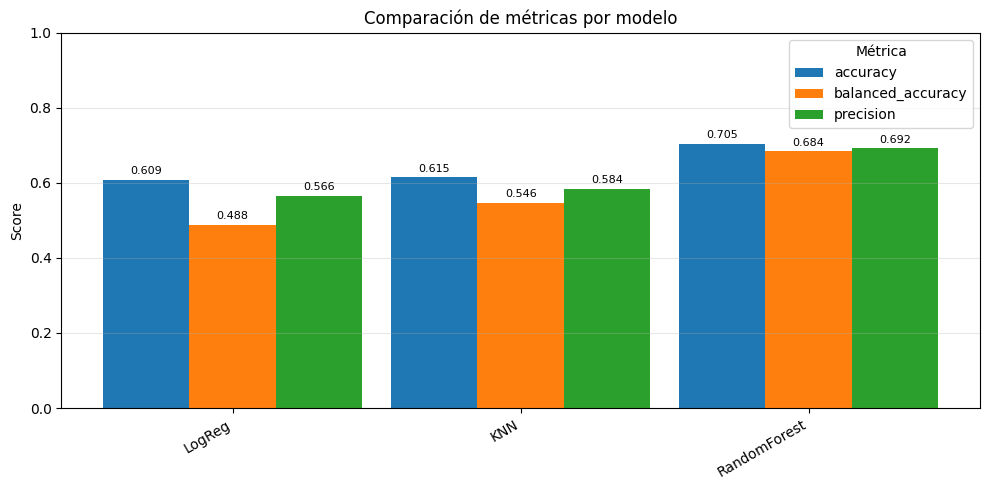

In [467]:
metrics = ['accuracy', 'balanced_accuracy', 'precision']  # columnas del data frame 
labels = tabla_resumen['Modelo'].astype(str).tolist()     # nombres de los modelos
x = np.arange(len(labels))                                # posicion en el grafico
width = 0.30                                              # anchura barra

# grafico ( figura)  y ejes ( ax)
fig, ax = plt.subplots(figsize=(10, 5))
for i, m in enumerate(metrics):
    vals = tabla_resumen[m].values                        # valor de la metrica por cada modelo
    ax.bar(x + (i - (len(metrics)-1)/2)*width, vals, width, label=m)  # centra las barras alrededor de x

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30, ha='right')
ax.set_ylabel('Score')
ax.set_title('Comparación de métricas por modelo')
ax.set_ylim(0, 1)
ax.legend(title='Métrica')
ax.grid(axis='y', alpha=0.3)

# Anotar valores encima de las barras
for i in range(len(labels)):
    for j, m in enumerate(metrics):
        v = tabla_resumen.loc[i, m]
        xpos = x[i] + (j - (len(metrics)-1)/2)*width
        ax.text(xpos, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

CONCLUSION: 

Tenemos mejora progresiva de las metricas.

# VALIDACION CRUZADA
 ( medias de las metricas entre modelos - generalizacion)

Evaluacion y generizacion de modelos:
 * utilizando el mismo procesado ( definido previamente)
 * misma validadcion cruzada
 * distintas metricas de calificacion

In [490]:
# dividimos los datos en 5 fold , barajando antes de realizar la particion , fijando lam semilla a 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# guardamos en la variable, un diccionario con los modelos estudiados
modelos = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),    
    'RandomForest': RandomForestClassifier(random_state=42)
}
# guardamos las metricas que queremos estudiar. Macro promedia la metrica por cada clase.No es frecuencia- Cada Clase pesa lo mismo.
scoring = ['accuracy','precision_macro','recall_macro','f1_macro','balanced_accuracy']

resultados = []    #  donde guardaremos los resultados.

#iteramos cada modelo, con el mismo pipeline_all ( agrupa el preprocesamiento definido anteriormente)
for nombre, modelo in modelos.items():
    pipe = make_pipeline(pipeline_all, modelo)   # el pipelinte definitivo con preprocesado y modelo.   
    res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, return_train_score=True)  # aplicamos el cros-validate, con varias metricas.
    resultados.append({
        'Modelo': nombre,
        'train_accuracy': res['train_accuracy'].mean(),   # array con 5 valores y su media
        'test_accuracy': res['test_accuracy'].mean(), 
        'train_f1': res['train_f1_macro'].mean(),
        'test_f1': res['test_f1_macro'].mean(), 
        'precision_macro_mean': res['test_precision_macro'].mean(),   # metrica de medias de predicion pro clases . (Indica si el modelo se equivoca mucho cuando predice una clase)
        'recall_macro_mean': res['test_recall_macro'].mean(),         # metrica para ver si el modelo se está olvidando de clases minoritarias,
        'balanced_acc_mean': res['test_balanced_accuracy'].mean()      #  metrica para ver el balanceo 
    })

df_resultados = pd.DataFrame(resultados).sort_values('test_f1', ascending=False) # se ordena segun el f1 ( media entre precion y recall)
display(df_resultados)


,Modelo,train_accuracy,test_accuracy,train_f1,test_f1,precision_macro_mean,recall_macro_mean,balanced_acc_mean
2,RandomForest,1.000000,0.70850,1.000000,0.681549,0.708656,0.670461,0.670461
1,KNN,0.730438,0.61925,0.705713,0.568886,0.617561,0.552246,0.552246
0,LogisticRegression,0.620625,0.61150,0.506385,0.490181,0.570575,0.484464,0.484464


ANALISIS [ OVERFITTING - UNDERFITTING] POR MODELOS:

- RandomForest --> en train_accuracy aprende perfectamente, mientras en test baja notablemente. Esto nos indica que está sobreajustado (OVERFITTING).
  este modelo es muy potente y utiliza mucha ramas y puede que esta memorizando
- KNN --> hay una ligera diferencia entre train ( mas alto) y test, y puede que halla un ligero OVERFITTING
  es posible que este modelo no està captando bien los datos.
- Regresion Logistica--> los valore son practicamente identicos,no hay OVERFITTING pero los valroes son bajos ( lo veniamos viendo) 
  el modelo no aprende lo suficiente, no puede captar las relaciones de los datos.
- precision_macro en todos los modelos con valores muy bajos, nos está indicando que confunde clases entre si
- recall_macro muy bajo, indica que el modelo no está captando bien las clases minoritaria.
- balances_accuracy muy bajo nos confirma que la varibale y está desbalanceada y está afectando a los resultados que ofrece el modelo.Esto puede que contribuya a que el modelo memorize la clase mayoritaria, y tiene en cuenta poco la calses minoritartrias.

Valoramos la posibilidad de ajustar los HYPERPARAMETROS de RandomFOrest porque los otros dos modelos no tienen suficiente capacidad parta captar datos en test.

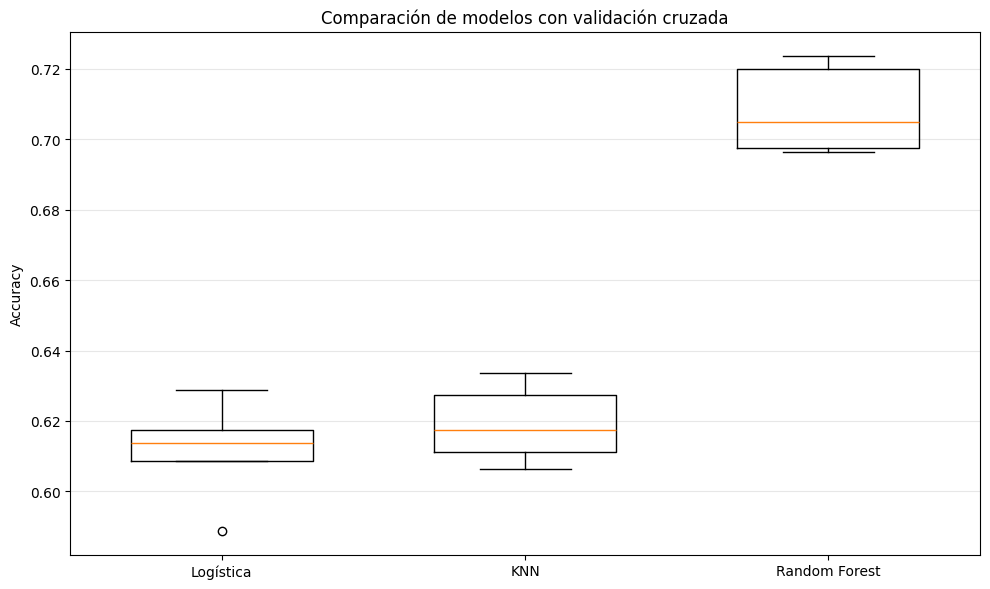

In [471]:
# Obtener scores detallados para cada modelo
fig, ax = plt.subplots(figsize=(10, 6))

posiciones = []
for i, (nombre, modelo) in enumerate(modelos.items()):
    pipe = make_pipeline(pipeline_all, modelo) 
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy')
    pos = ax.boxplot(scores, positions=[i], widths=0.6)
    posiciones.append(i)

ax.set_xticks(posiciones)
ax.set_xticklabels(modelos.keys())
ax.set_ylabel('Accuracy')
ax.set_title('Comparación de modelos con validación cruzada')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Evaluacion final  

In [527]:
modelo_elegido= RandomForestClassifier(random_state=42)

pipe_test= make_pipeline (pipeline_all, modelo_elegido)
pipe_test.fit(X_train , y_train)

y_pred = pipe_test.predict(X_test)

print("Accuracy test:", accuracy_score(y_test, y_pred))
print(f"F1_macro test:, {f1_score(y_test, y_pred, average='macro'):.4f}") 
print(f"Balanced accuracy test:, {balanced_accuracy_score(y_test, y_pred):.4f}")


print("\n -- REPORT CLASIFICACION -- ")
nombres_clases = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
print(classification_report(y_test, y_pred, target_names=nombres_clases))

Accuracy test: 0.705
F1_macro test:, 0.6982
Balanced accuracy test:, 0.6844

 -- REPORT CLASIFICACION -- 
              precision    recall  f1-score   support

        Fair       0.96      0.81      0.88        32
        Good       0.70      0.61      0.65        93
   Very Good       0.81      0.88      0.84       391
     Premium       0.65      0.76      0.70       262
       Ideal       0.50      0.36      0.42       222

    accuracy                           0.70      1000
   macro avg       0.72      0.68      0.70      1000
weighted avg       0.69      0.70      0.69      1000



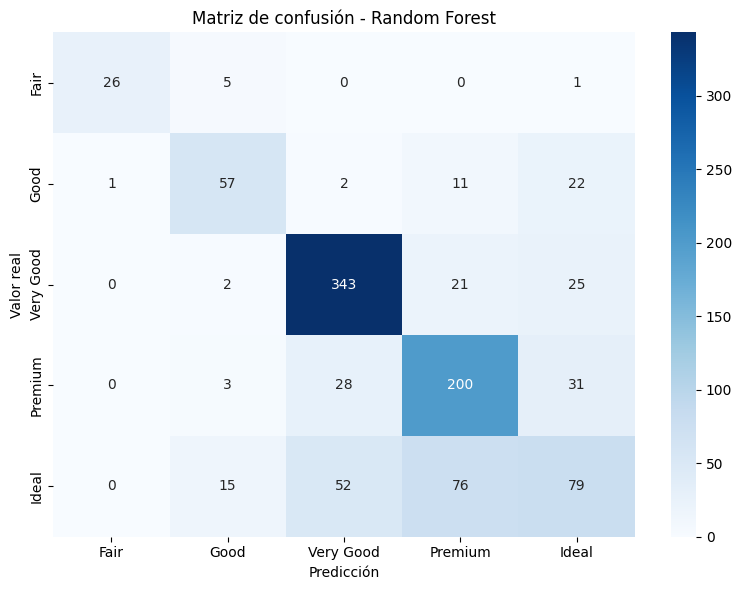

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nombres_clases,
            yticklabels=nombres_clases)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - Random Forest')
plt.tight_layout()
plt.show()

# Conclusiones

El modelo que mejor predice es el RandomForest. No tenemos unos parametros muy buenos y podriamos mejorarlo ajustando susu hyperparametros.

Con un accuracy moderada, un F1_macro y Balanced bajos nos indican que el rendimiento pro clase no es suficiente.

El modelo está favoreciendo clases donde hay mas valores

La causa probable es el desbalanceo de y, admas de la correlacion carat/price que no esta clara.

Mejoras posibles: 
- Priorizaremos balancear la calse y
- Ajustar los hyperparametros del Modelo elegido
- Probar otros encoding. Tal vez probar con Ordinal para la feature 'cut'
- comprobar sesgos.
- Vigilar la metriac F1 y Balanced_accuracy.
